In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers




<AxesSubplot:>

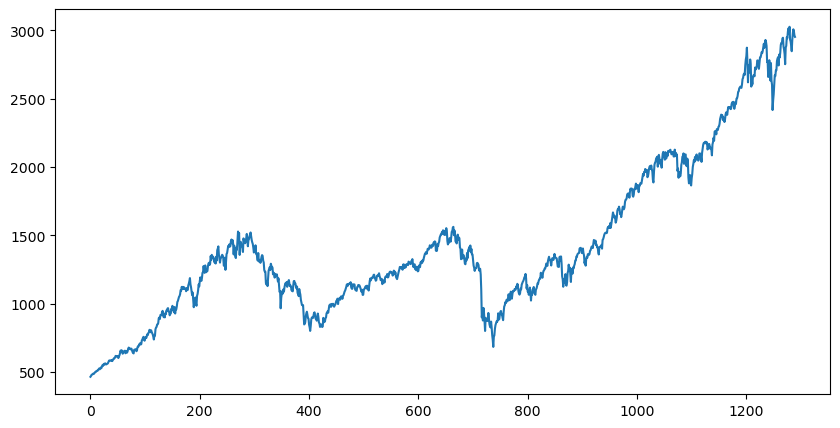

In [2]:
data = pd.read_excel(r'C:\Users\AmineAk\Desktop\amine akremi TP 3 ML\data_folder\SPX.xlsx')


plt.figure(figsize=(10, 5))
data['Close'].plot()

In [3]:
data = data.reset_index()
x = np.array(data.index).reshape(-1, 1)
y = data['Close']

In [4]:
linreg = LinearRegression().fit(x, y)
linreg.score(x, y)
predictions = linreg.predict(x)

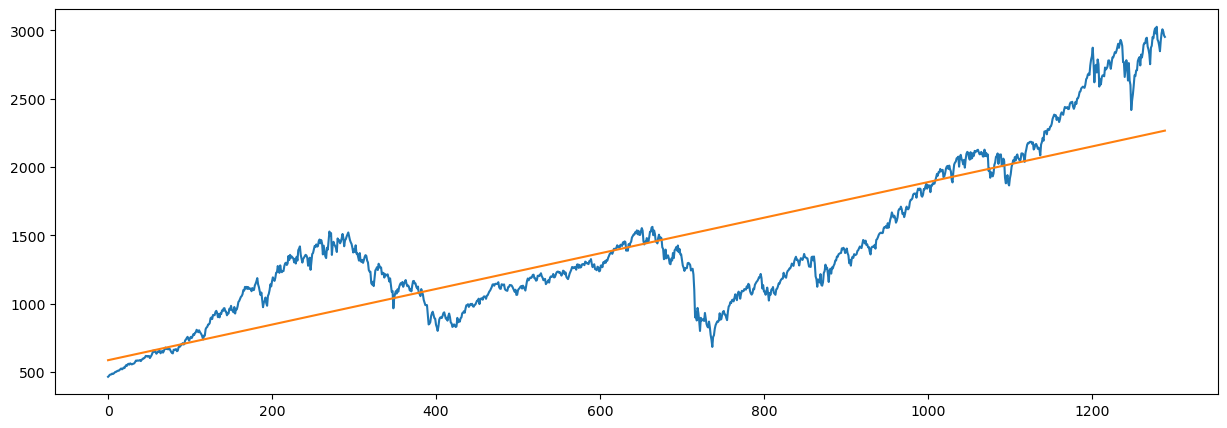

In [5]:
plt.figure(figsize=(15,5))
plt.plot(data['Close'])
plt.plot(data.index, predictions)

In [6]:
mae= mean_absolute_error(data.index,predictions)
print("LinearRegression mae :" , mae)
mse=mean_squared_error(data.index,predictions)
print("LinearRegression mse :" , mse)
R2 = r2_score(data.index,predictions)
print("LinearRegression R2 :" , R2)

LinearRegression mae : 781.460519379845
LinearRegression mse : 623425.0043788026
LinearRegression R2 : -3.4955859312130055


In [7]:
#***************************

In [8]:
stock_data = pd.read_excel(r'C:\Users\AmineAk\Desktop\amine akremi TP 3 ML\data_folder\SPX.xlsx')
stock_data = stock_data.reset_index()
x = np.array(stock_data.index).reshape(-1, 1)
y = stock_data['Close']



In [9]:
linreg = RandomForestRegressor().fit(x, y)
linreg.score(x, y)
predictions = linreg.predict(x)

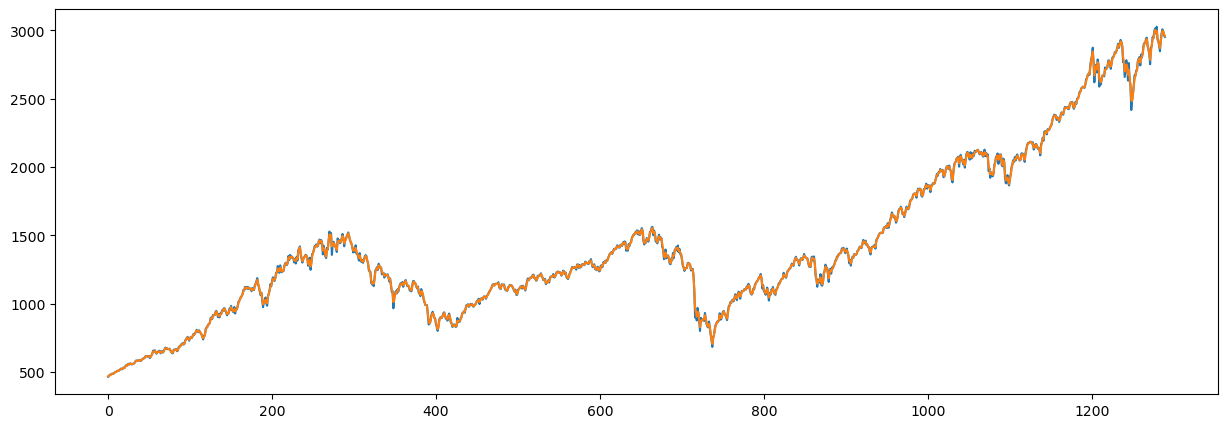

In [10]:
plt.figure(figsize=(15,5))
plt.plot(stock_data['Close'])
plt.plot(stock_data.index, predictions)

In [11]:
mae= mean_absolute_error(stock_data.index,predictions)
print("RandomForestRegressormae :" , mae)
mse=mean_squared_error(stock_data.index,predictions)
print("RandomForestRegressormse :" , mse)
R2 = r2_score(stock_data.index,predictions)
print("RandomForestRegressorR2 :" , R2)

RandomForestRegressormae : 781.2587599224806
RandomForestRegressormse : 727614.9072178027
RandomForestRegressorR2 : -4.24691072262746


In [12]:
#########################

In [13]:
df_SPX=pd.read_fwf(r'C:\Users\AmineAk\Desktop\amine akremi TP 3 ML\data_folder\SPX.txt')
df_SPX.columns = ['Date',"Close"]

df_SPX["Close"]=df_SPX.Close.astype(float)

df_SPX["Date"]=pd.to_datetime(df_SPX["Date"])

df_SPX.set_index('Date', inplace=True)

C:\Users\AmineAk\AppData\Local\Temp\ipykernel_6312\3650259850.py:6: UserWarning: Parsing '13/01/1995' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_SPX["Date"]=pd.to_datetime(df_SPX["Date"])
C:\Users\AmineAk\AppData\Local\Temp\ipykernel_6312\3650259850.py:6: UserWarning: Parsing '20/01/1995' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_SPX["Date"]=pd.to_datetime(df_SPX["Date"])
C:\Users\AmineAk\AppData\Local\Temp\ipykernel_6312\3650259850.py:6: UserWarning: Parsing '27/01/1995' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_SPX["Date"]=pd.to_datetime(df_SPX["Date"])
C:\Users\AmineAk\AppData\Local\Temp\ipykernel_6312\3650259850.py:6: UserWarning: Parsing '17/02/1995' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_SPX["Date"]=pd.to_datetime(df_SPX["Date"])
C:\U

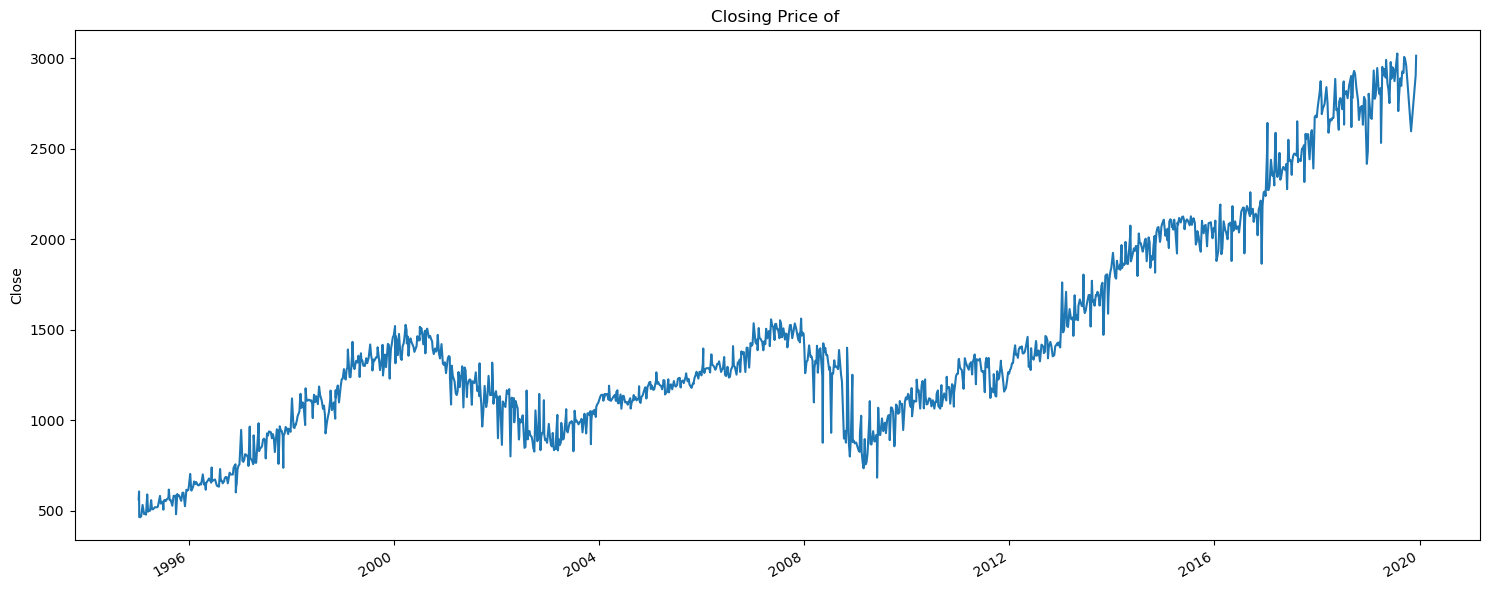

In [14]:
# Let's see a historical view of the closing price

plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)
df_SPX["Close"].plot()
plt.ylabel('Close')
plt.xlabel(None)
plt.title(f"Closing Price of ")
    
plt.tight_layout()

In [15]:
close_prices = df_SPX['Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [16]:
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [17]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=3)

Epoch 1/3
973/973 [==============================] - 59s 56ms/step - loss: 0.0013
Epoch 2/3
973/973 [==============================] - 55s 56ms/step - loss: 5.0914e-04
Epoch 3/3
973/973 [==============================] - 56s 57ms/step - loss: 3.7681e-04


In [19]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

9/9 [==============================] - 2s 32ms/step


157.9350056966146

C:\Users\AmineAk\AppData\Local\Temp\ipykernel_6312\2527444581.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


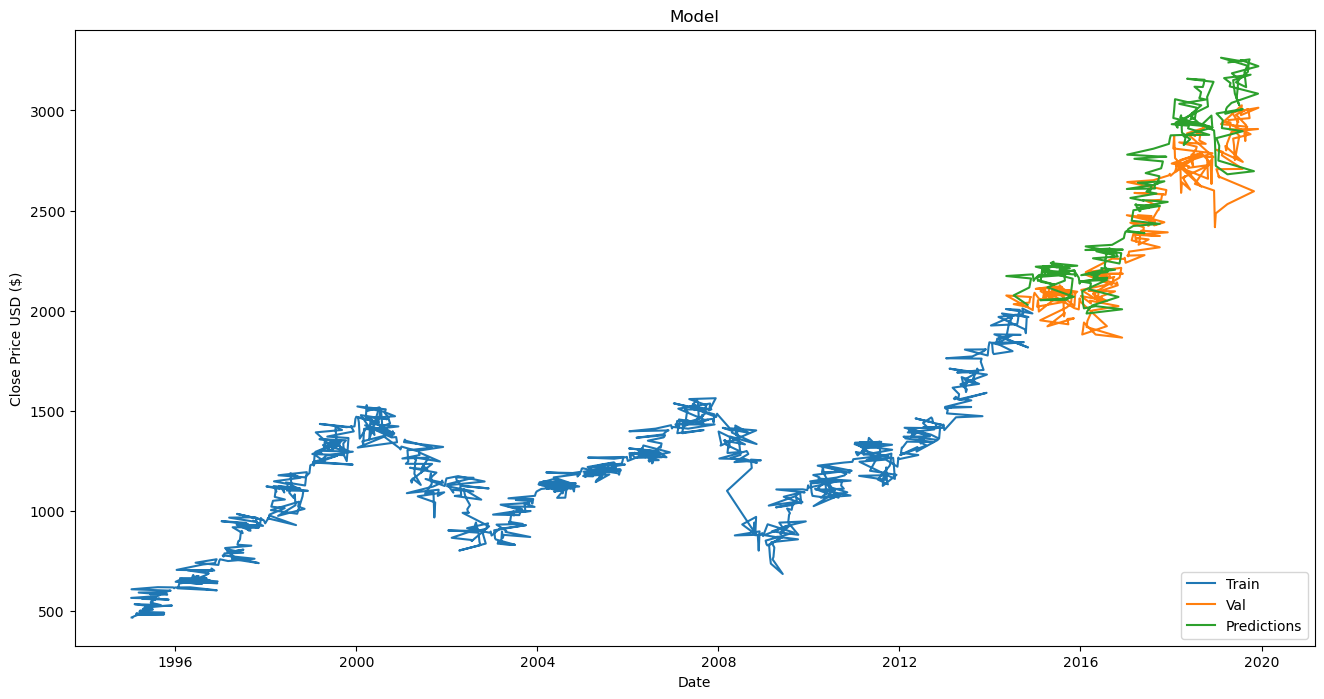

In [20]:
data = df_SPX.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [21]:
mae= mean_absolute_error(y_test,predictions)
print("LSTMmae :" , mae)
mse=mean_squared_error(y_test,predictions)
print("LSTMmse :" , mse)
R2 = r2_score(y_test,predictions)
print("LSTMR2 :" , R2)

LSTMmae : 157.93500569661458
LSTMmse : 29945.41984131089
LSTMR2 : 0.7357230276723203


In [22]:
RESULTAT = pd.read_excel(r'C:\Users\AmineAk\Desktop\amine akremi TP 3 ML\data_folder\RESULTAT.xlsx')
RESULTAT

,Unnamed: 0,mean_absolute_error,mean_squared_error,r2_score
0,LinearRegression,781.460519,623425.004379,-3.495586
1,RandomForestRegressor,781.100204,727278.185810,-4.244483
2,LSTM,82.984089,8392.902512,0.925930
